# **Customer Segmentation: Entendiendo a grupos de clientes bancarios mediante KMeans**

# **PACE stages**

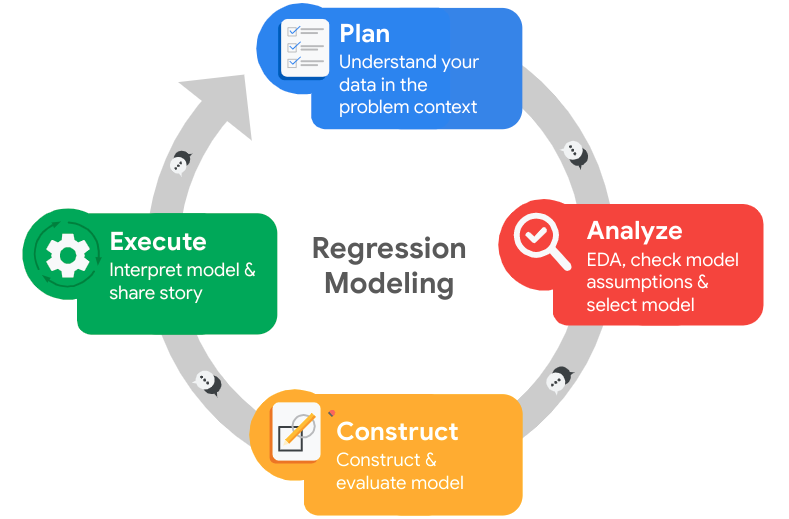

## **Pace: Plan**

### Escenario de negocio/problema

El dataset contiene información sobre clientes de un banco ficticio.

**Objetivo:** Desarrollar un modelo no supervisado de Machine Learning para agrupar a clientes similares y basado en sus características, entonces ofrecer productos personalizados.


### Importaciones

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cs_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/proyectos/customer_segmentation/data.csv')

### Entendiendo los datos

In [4]:
cs_data.shape

(10127, 14)

In [5]:
cs_data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [6]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [7]:
cs_data.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


### Revisar Duplicados y valores faltantes

In [8]:
cs_data.duplicated().sum()

np.int64(0)

In [ ]:
cs_data.isna().sum()

,0
customer_id,0
age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
estimated_income,0
months_on_book,0
total_relationship_count,0
months_inactive_12_mon,0


Como un primer paso hemos analizado brevemente el contenido del data set. El cual consta de 10127 observaciones no nulas no repetidas y 14 columnas.

### Diccionario de Datos

| Variable | Tipo de Dato | Descripción |
| :--- | :--- | :--- |
| **customer_id** | `int64` | Identificador único del cliente. |
| **age** | `int64` | Edad del cliente en años. |
| **gender** | `object` | Género del cliente (M = Masculino, F = Femenino). |
| **dependent_count** | `int64` | Número de personas que dependen económicamente del cliente. |
| **education_level** | `object` | Nivel educativo máximo alcanzado. |
| **marital_status** | `object` | Estado civil del cliente. |
| **estimated_income** | `int64` | Ingreso anual estimado del cliente. |
| **months_on_book** | `int64` | Antigüedad del cliente en el banco (meses). |
| **total_relationship_count** | `int64` | Número de productos contratados por el cliente. |
| **months_inactive_12_mon** | `int64` | Meses de inactividad en el último año. |
| **credit_limit** | `float64` | Límite de crédito máximo en la tarjeta. |
| **total_trans_amount** | `int64` | Monto total transaccionado en los últimos 12 meses. |
| **total_trans_count** | `int64` | Cantidad total de transacciones en los últimos 12 meses. |
| **avg_utilization_ratio** | `float64` | Índice de utilización de la línea de crédito (0 a 1). |
| **avg_transaction_value** | `float64` | *Feature Engineering*: Monto promedio por transacción individual. |



## **pAce: Analyze**

### Análisis de las variables categóricas

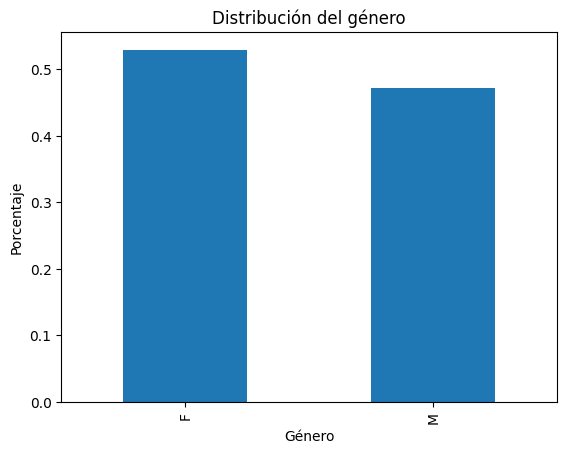

In [ ]:
ct_gender = pd.crosstab(cs_data['gender'], 'count', normalize=True)
ct_gender.plot.bar(title='Distribución del género',
                   xlabel='Género',
                   ylabel='Porcentaje',
                   legend=False);

<Axes: title={'center': 'Distribución del nivel educativo'}, xlabel='Nivel educativo', ylabel='%'>

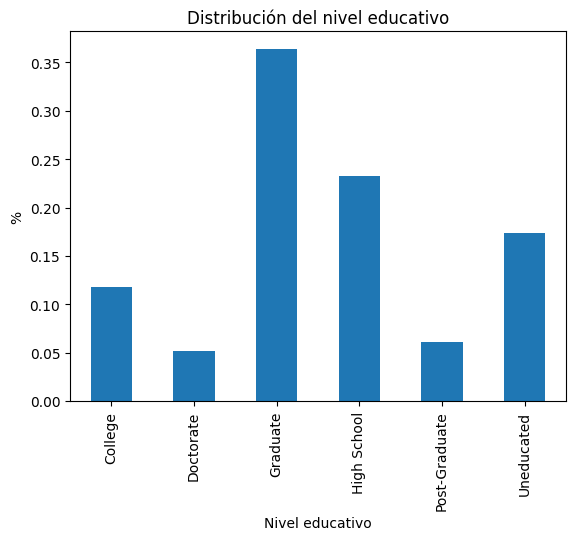

In [ ]:
ct_education = pd.crosstab(cs_data['education_level'], 'count', normalize=True)
ct_education.plot.bar(title='Distribución del nivel educativo',
                      xlabel='Nivel educativo',
                      ylabel='Porcentaje',
                      legend=False)

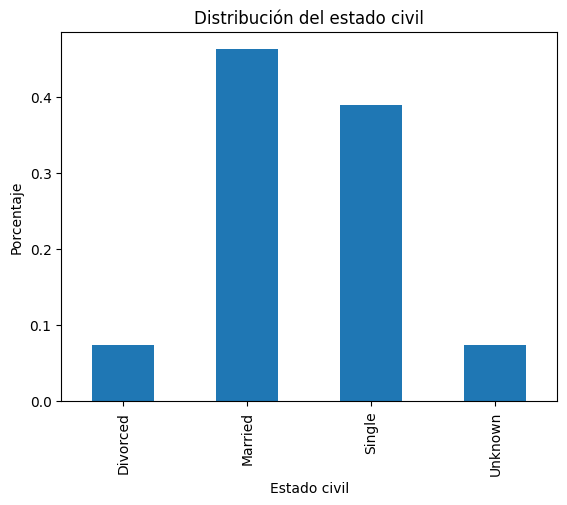

In [ ]:
ct_marital = pd.crosstab(cs_data['marital_status'], 'count', normalize=True)
ct_marital.plot.bar(title='Distribución del estado civil',
                    xlabel='Estado civil',
                    ylabel='Porcentaje',
                    legend=False);

Obtenemos los siguientes insights:

- Cantidad ligeramente mayor del sexo femenino.
- La mayoría de los clientes son graduados de alguna licenciatura o grado, seguido por clientes con una educación media superior concluida. clientes con especialidad/maestria u doctorado son los menos comunes.
- La mayoría de los clientes se encuentran casados o solteros. También hay una cantidad importante de clientes en los que no se conoce su estado civil. Si el estado civil es importante se recomienda atender esta falta de información.



También obseremos la distribución de algunas variables numéricas.

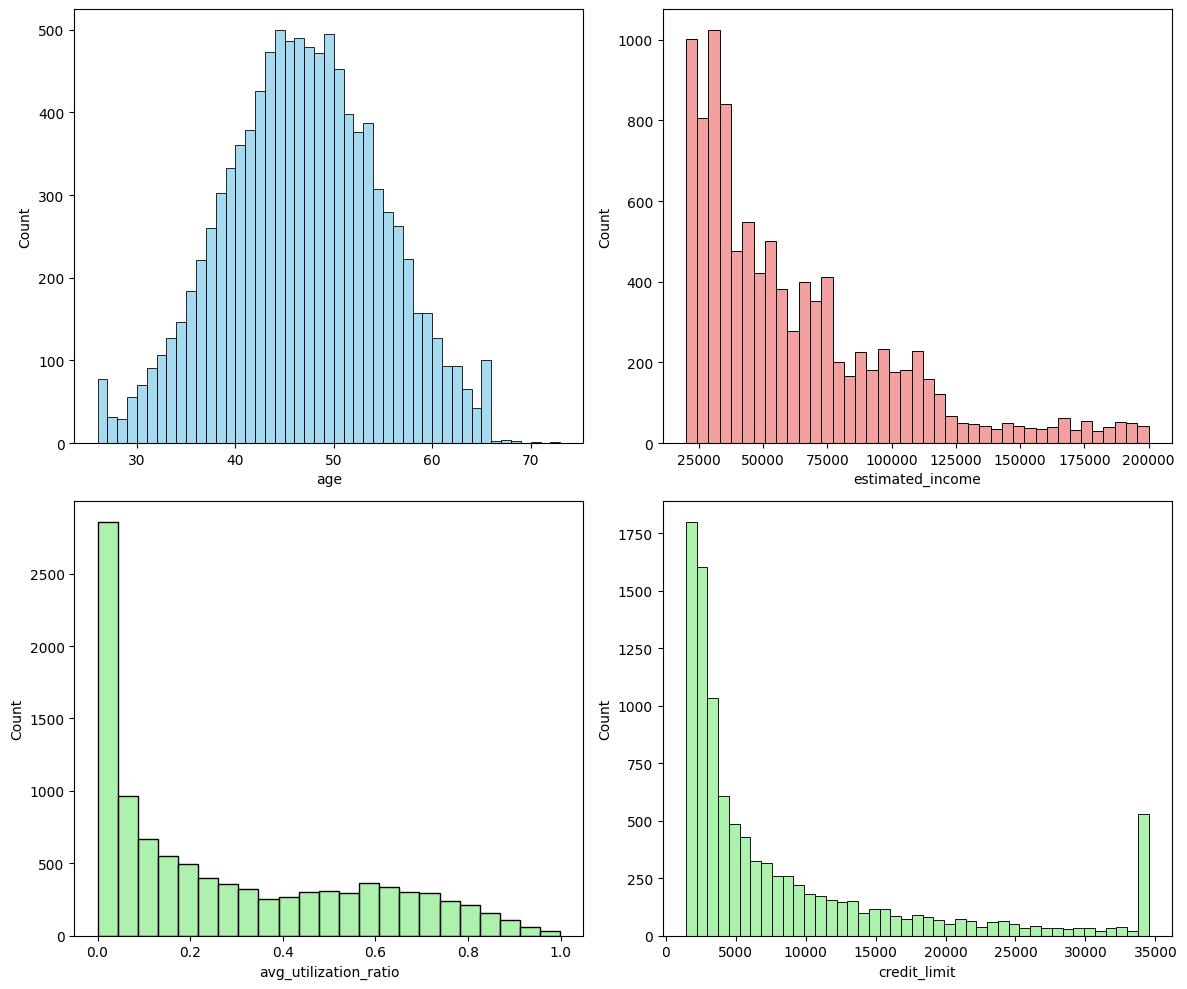

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
sns.histplot(cs_data['age'], ax=axes[0], color='skyblue')
sns.histplot(cs_data['estimated_income'], ax=axes[1], color='lightcoral')
sns.histplot(cs_data['credit_limit'], ax=axes[3], color='lightgreen')
sns.histplot(cs_data['avg_utilization_ratio'], ax=axes[2], color='lightgreen')
plt.tight_layout()
plt.show()

Además también hemos notado que
- La edad se distribuye normalmente
- los ingresos estimados se encuentran sesgados hacia la izquierda al igual que el límite de crédito.
- `avg_utilization_ratio` muestra a muchos clientes utilizando un porcentaje bajo de su línea de crédito y pocos clientes utilizando la totalidad de su línea de crédito.

### Analizando los valores atípicos.

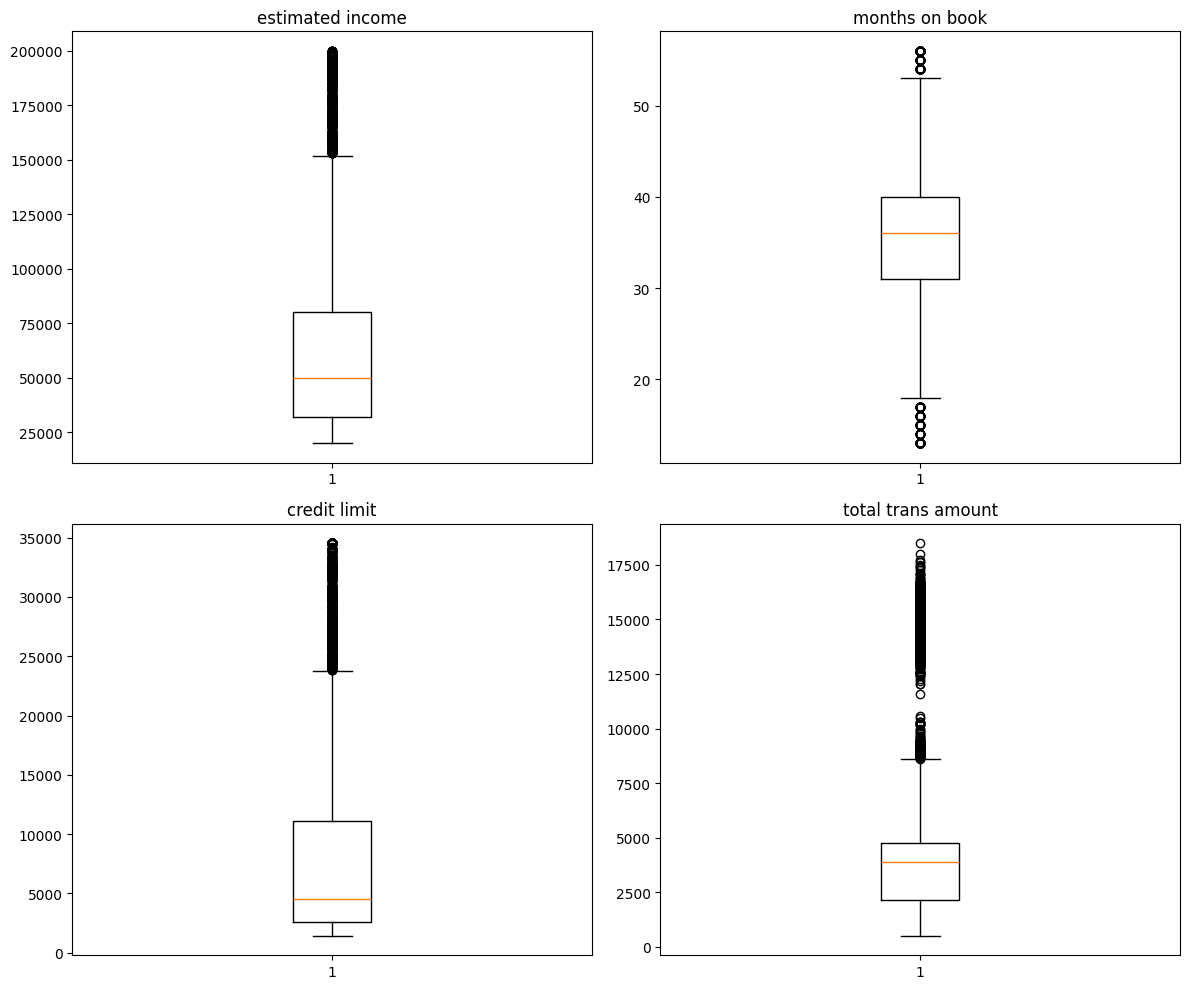

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

axes[0].boxplot(cs_data['estimated_income'], )
axes[0].set_title('estimated income')

axes[1].boxplot(cs_data['months_on_book'])
axes[1].set_title('months on book')

axes[2].boxplot(cs_data['credit_limit'])
axes[2].set_title('credit limit')

axes[3].boxplot(cs_data['total_trans_amount'])
axes[3].set_title('total trans amount')

plt.tight_layout()
plt.show()

Es evidente que hay una gran cantidad de valores atípicos en las variables anteriores. Se debe tomar una decisión porque KMeans es bastante sensible a datos atípicos (pueden mover los centroides). Más adelante utilizaremos una transformación logarítmica sobre estas variables.

Otra consideración que toma KMeans es que las variables no están altamente correlacionadas (Multicolinearidad). Naturalemnte haremos una matriz de correlación para explorar este supuesto.

In [26]:
cs_data.columns

Index(['customer_id', 'age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

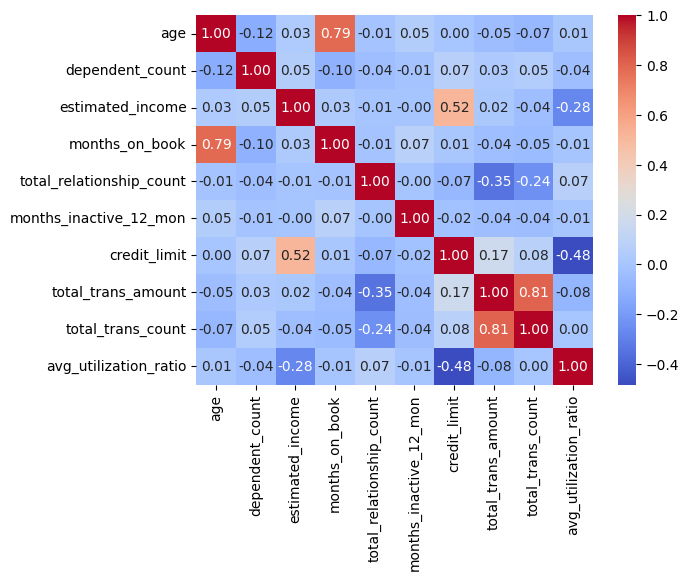

In [29]:
numeric_cols = ['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']

sns.heatmap(cs_data[numeric_cols].corr(method='pearson'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Hemos encontrado que existe una alta correlación entre las siguientes variables:

- total_trans_amount & total_trans_count -> 0.81
- age & months_on_books -> 0.79
- credit_limit & estimated_income -> 0.52

Como he mencionado KMeans es un algoritmo bastante sensible a features con una alta correlación.

### Feature Engineering

Eliminemos columnas que no serán de utilidad.

- **customer_id:** es solo una variable de identificación.
- **months_on_book:** Tiene una correlación alta con la variable `age` y esta última se distribuye normalmente sin valores atípicos.

In [30]:
# Feature selection

cs_prepro = cs_data.drop(columns=['customer_id', 'months_on_book'])
cs_prepro.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,45,M,3,High School,Married,69000,5,1,12691.0,1144,42,0.061
1,49,F,5,Graduate,Single,24000,6,1,8256.0,1291,33,0.105
2,51,M,3,Graduate,Married,93000,4,1,3418.0,1887,20,0.000
3,40,F,4,High School,Unknown,37000,3,4,3313.0,1171,20,0.760
4,40,M,3,Uneducated,Married,65000,5,1,4716.0,816,28,0.000


In [31]:
# Feature extraction
cs_prepro['avg_transaction_value'] = cs_prepro['total_trans_amount'] / cs_prepro['total_trans_count']
cs_prepro = cs_prepro.drop(columns=['total_trans_amount', 'total_trans_count'])
cs_prepro.head()


,age,gender,dependent_count,education_level,marital_status,estimated_income,total_relationship_count,months_inactive_12_mon,credit_limit,avg_utilization_ratio,avg_transaction_value
0,45,M,3,High School,Married,69000,5,1,12691.0,0.061,27.238095
1,49,F,5,Graduate,Single,24000,6,1,8256.0,0.105,39.121212
2,51,M,3,Graduate,Married,93000,4,1,3418.0,0.000,94.350000
3,40,F,4,High School,Unknown,37000,3,4,3313.0,0.760,58.550000
4,40,M,3,Uneducated,Married,65000,5,1,4716.0,0.000,29.142857


In [33]:
# Feature transformation

edu_map = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5, 'Unknown': 0}
cs_prepro['education_level'] = cs_prepro['education_level'].map(edu_map)

cs_prepro = pd.get_dummies(cs_prepro, columns=['gender', 'marital_status'], drop_first=True)

In [34]:
features_to_log = ['estimated_income', 'credit_limit', 'avg_transaction_value']
cs_prepro[features_to_log] = np.log1p(cs_prepro[features_to_log])

In [35]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(cs_prepro)

## paCe: Construct

Comencemos con la construcción del modelo. En primer lugar utilicemos el método del codo para identificar el número idóneo de clústers.

### Análisis de inercia y silueta

In [39]:
def elbow_method(n_clusters, data):
  inertia = []

  for n in n_clusters:

    kms = KMeans(n_clusters=n, random_state=42)
    kms.fit(data)
    inertia.append(kms.inertia_)

  return inertia

In [40]:
n_clusters = [i for i in range(1,16)]

inercias = elbow_method(n_clusters, features_scaled)

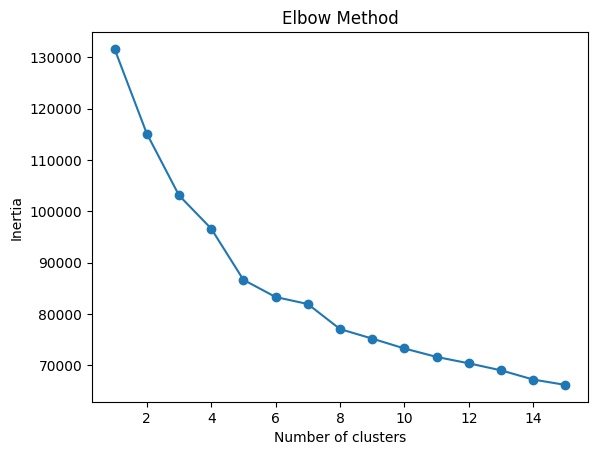

In [41]:
plt.plot(n_clusters, inercias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [42]:
def kmeans_sil(n_clusters, data):

  silhouette = []
  for n in n_clusters:
    kms=KMeans(n_clusters=n, random_state=42)
    kms.fit(data)
    silhouette.append(silhouette_score(data, kms.labels_))
  return silhouette

In [43]:
n_clusters = range(2,16)

sil = kmeans_sil(n_clusters, features_scaled)

Text(0, 0.5, 'Silhouette Score')

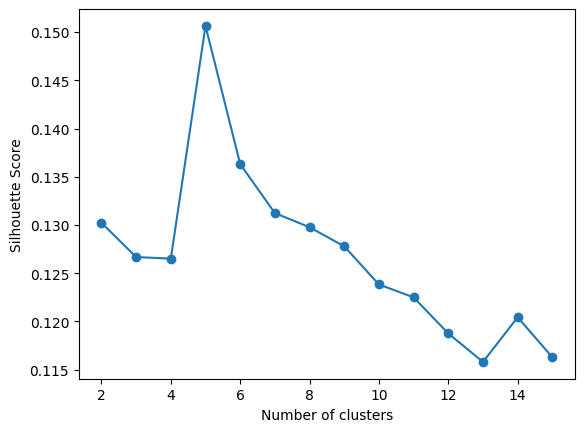

In [44]:
plt.plot(n_clusters, sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

## **pacE: Execute**

El método de codo y el coeficiente de silueta sugieren que se podría tomar k=5.

In [45]:
kmn5 = KMeans(n_clusters=5, random_state=42)
kmn5.fit(features_scaled)

KMeans(n_clusters=5, random_state=42)

In [46]:
np.unique(kmn5.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [47]:
cs_data['cluster'] = kmn5.labels_
cs_data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,4
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,4
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,2
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,4


### Interpretación del modelo

In [49]:
numeric_cols = [
    'age', 'dependent_count', 'estimated_income', 'total_relationship_count',
    'months_inactive_12_mon', 'credit_limit', 'total_trans_count',
    'avg_utilization_ratio'
]

# Calculamos la media por cluster de las columnas numéricas
df_profile = cs_data.groupby('cluster')[numeric_cols].mean()

#Número de clientes en cada cluster
df_profile['count'] = cs_data.groupby('cluster').size()

#Transpuesta
print(df_profile.T)

cluster                              0             1             2  \
age                          46.858392     46.373964     45.568758   
dependent_count               2.292297      2.396450      2.538051   
estimated_income          37900.437269  92019.526627  62113.484646   
total_relationship_count      3.892701      3.719527      3.761015   
months_inactive_12_mon        2.357215      2.330769      2.323097   
credit_limit               3939.894719  15432.767101   9445.283178   
total_trans_count            62.671039     67.666864     67.146862   
avg_utilization_ratio         0.394004      0.121308      0.255899   
count                      2973.000000   1690.000000    749.000000   

cluster                              3             4  
age                          46.066017     46.118389  
dependent_count               2.188746      2.462978  
estimated_income          38007.532122  92827.095199  
total_relationship_count      3.819672      3.788853  
months_inactive_12_mon  

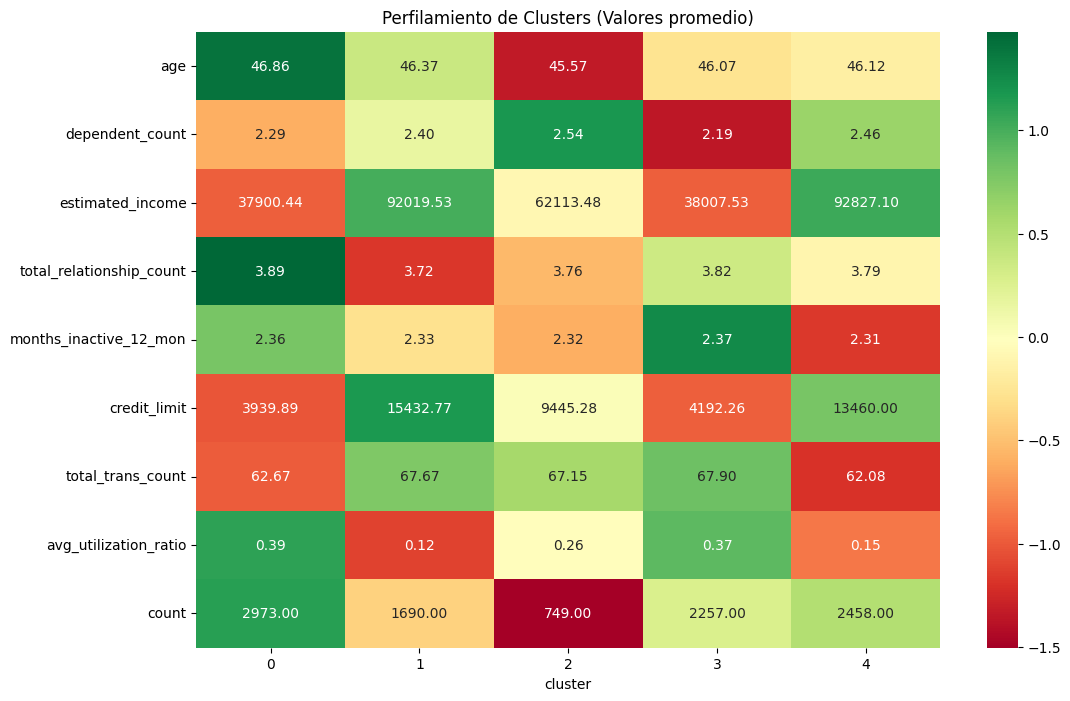

In [53]:
# Normalizamos el perfil solo para la visualización del heatmap
df_profile_norm = (df_profile - df_profile.mean()) / df_profile.std()

plt.figure(figsize=(12, 8))
sns.heatmap(df_profile_norm.T, cmap='RdYlGn', annot=df_profile.T, fmt=".2f")
plt.title('Perfilamiento de Clusters (Valores promedio)')
plt.show()

*   **Cluster 0:** Segmento con más miembros. Se caracteriza por ingresos bajos y crédito bajo en comparación con los otros cluster. La edad promedio es más alta en este cluster y presenta la tasa de utilización  más alta con el promedio de productos contratados más alto
*   **Cluster 1:** Posee uno de los ingresos más altos y el límite de crédito más alto. Tienen la tasa de utilización más baja, su nivel de transacción es sólido.
* **Cluster 2:** Es el grupo con la menor edad promedio y el mayor número de dependientes. Es el cluster más pequeño.
* **cluster 3:** Ingresos bajos y límites de crédito reducidos. A diferencia del cluster 0 este segmento tiene ua inactividad ligeramente mayor y es el segundo más numeroso. También tiene una utilización alta del crédito.
* **Cluster 4:** Es el grupo con el ingreso promedio más alto (\$92,827) y un límite de crédito generoso (\$13,460). Tienen una tasa de utilización baja y son los que menos trasacciones realizan.


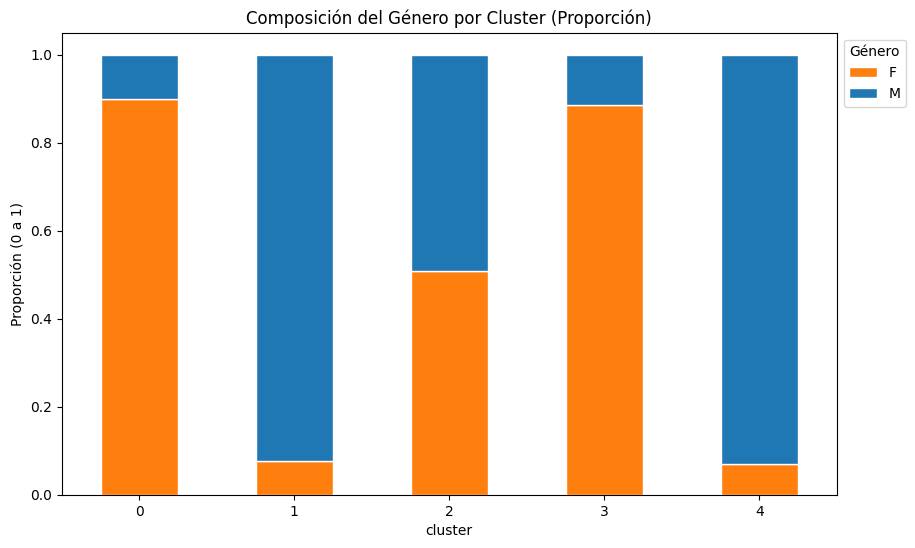

In [55]:
gender_dist = pd.crosstab(cs_data['cluster'], cs_data['gender'], normalize='index')

gender_dist.plot.bar(
                 stacked=True,
                 figsize=(10, 6),
                 color=['C1','C0'],
                 edgecolor='white')

plt.title('Composición del Género por Cluster (Proporción)')
plt.legend(title='Género', bbox_to_anchor=(1, 1))
plt.ylabel('Proporción (0 a 1)')
plt.xticks(rotation=0)
plt.show()

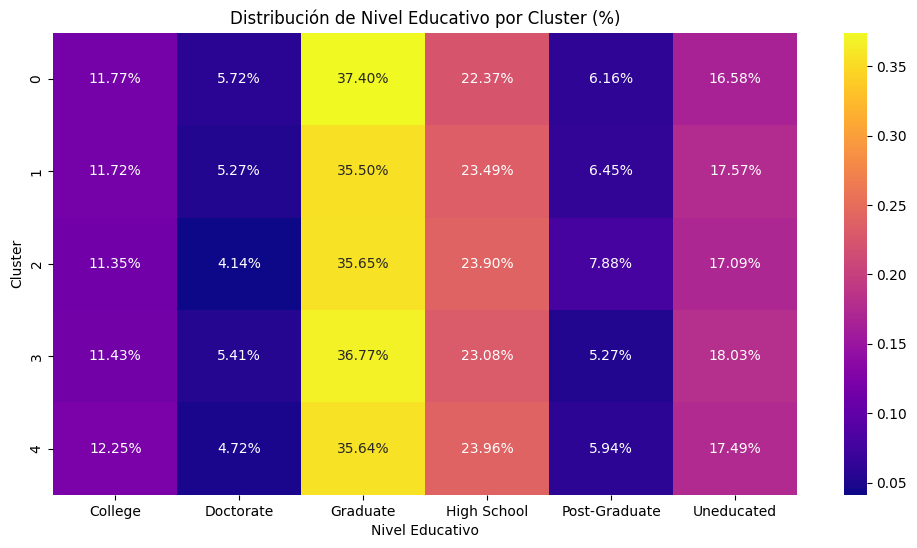

In [56]:
ct_edu = pd.crosstab(cs_data['cluster'], cs_data['education_level'], normalize='index')

plt.figure(figsize=(12, 6))
sns.heatmap(ct_edu, annot=True, fmt=".2%", cmap='plasma')
plt.title('Distribución de Nivel Educativo por Cluster (%)')
plt.ylabel('Cluster')
plt.xlabel('Nivel Educativo')
plt.show()

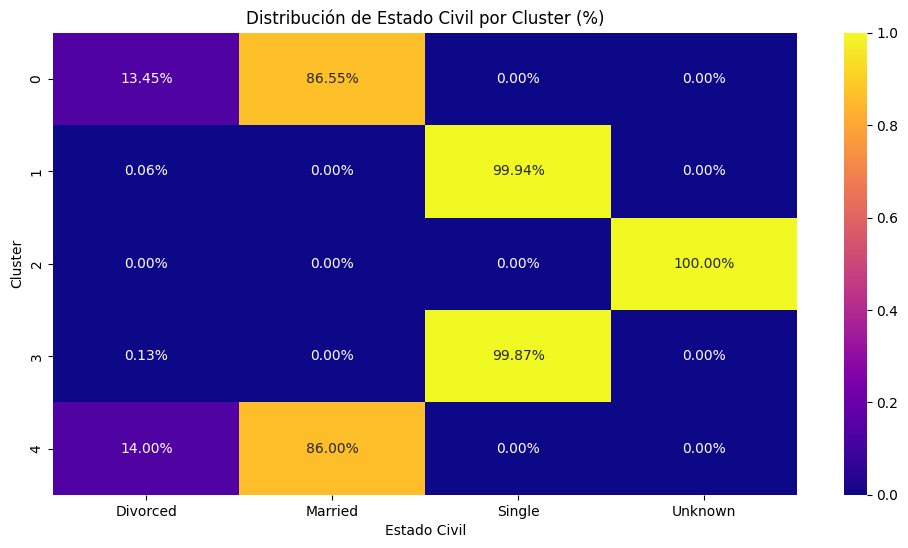

In [57]:
ct_ms = pd.crosstab(cs_data['cluster'], cs_data['marital_status'], normalize='index')

plt.figure(figsize=(12, 6))
sns.heatmap(ct_ms, annot=True, fmt=".2%", cmap='plasma')
plt.title('Distribución de Estado Civil por Cluster (%)')
plt.ylabel('Cluster')
plt.xlabel('Estado Civil')
plt.show()


Con esta nueva información ahora tenemos más información sobre el perfil demográfico de cada cluster:

*   **Cluster 0:** Segmento con más miembros. Se caracteriza por ingresos bajos y líneas de crédito bajo en comparación con los otros cluster. La edad promedio es más alta en este cluster y presenta la tasa de utilización  más alta con el promedio de productos contratados más alto.
**Perfil demográfico:** Está constituido mayormente por mujeres casadas (86.55%) y divorciados (13.45%).
*   **Cluster 1:** Posee uno de los ingresos más altos y el límite de crédito más alto. Tienen la tasa de utilización más baja, su nivel de transacción es sólido. **Perfil demográfico:** Se constituye mayormente por hombres solteros (99.94%).
* **Cluster 2:** Es el grupo con la menor edad promedio y el mayor número de dependientes. Es el cluster más pequeño. **Perfil demográfico:** El estado civil de este segmento es desconocido se constituye en igual cantidad por hombres y mujeres.
* **cluster 3:** Ingresos bajos y límites de crédito reducidos. A diferencia del cluster 0 este segmento tiene una inactividad ligeramente mayor y es el segundo segmento más numeroso. También tiene una utilización alta del crédito. **Perfil demográfico:** Compuesto mayoritariamente por mujeres solteras(99.87%) y divorciadas (0.013%)
* **Cluster 4:** Es el grupo con el ingreso promedio más alto (\$92,827) y un límite de crédito generoso (\$13,460). Tienen una tasa de utilización baja y son los que menos trasacciones realizan. **Perfil demográfico:** Se compone mayoritariamente por hombres casados (86%) y divorciados (14%)




### Recomendaciones por cluster

* Cluster 0 (Alto Riesgo / Uso Diario): Debido a su alta tasa de utilización (39%) e ingresos bajos, este grupo es el más vulnerabe a impagos. Monitorear y Ofrecer productos de consolidación de deuda para reducir su carga financiera.

* Cluster 1: Representan el segmento con mayor límite de crédito pero menor uso. En este segmento, la estrategia debe enfocarse en la retención mediante beneficios premium (acceso a salas VIP, seguros de viaje) para asegurar que mantengan su capital en la institución bancaria.

* Cluster 2: Al ser el grupo más joven y con datos incompletos (100% Unknown en estado civil), la prioridad es el enriquecimiento de datos.

* Cluster 3: Es el segundo grupo más numerosos y con un uso constante del crédito, son ideales para campañas de cashback (p.e. supermercados y/o gasolineras) esto permitiría cimentar su lealtad.

* Cluster 4: Este grupo posee los ingresos más altos pero baja frecuencia de uso. Se recomiendan ofrecer productos de inversión o tarjetas de crédito con recompensas por volumen de gasto.